# EDUNET FOUNDATION- Self-Paced Exercise

## Lab 1
## Problem Statement

### Telecom Churn (loss of customers to competition) is a problem for telecom companies because it is expensive to acquire a new customer and companies want to retain their existing customers. 
### Here is provided a customer data comprising of mobile connection and related feature of many customers, also includes whether customer churned or not? Telecom Company needs Churn prediction model, to predict in advance whether customer will churn or not?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [2]:
df = pd.read_csv("ChurnData.csv")
df.head()

X = df.drop("churn" ,axis=1)
y = df["churn"]



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create a scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model with increased max_iter
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)


In [5]:
print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, predictions)}')
print(f'Classification Report:\n{classification_report(y_test, predictions)}')

Accuracy: 0.75
Confusion Matrix:
[[26  5]
 [ 5  4]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84        31
         1.0       0.44      0.44      0.44         9

    accuracy                           0.75        40
   macro avg       0.64      0.64      0.64        40
weighted avg       0.75      0.75      0.75        40



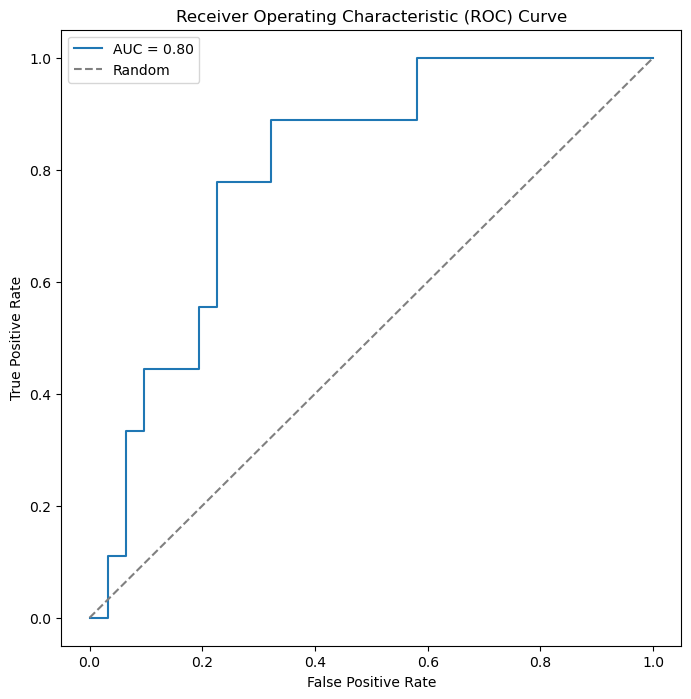

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
probs = model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, probs)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
